In [27]:
import numpy as np
from matplotlib.pyplot import figure
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import pandas as pd
from definitions import ROOT_DIR
%cd $ROOT_DIR
SHOW_TITLE = False

/home/x/doc/dev/master/CancerTherapyPrediction


In [28]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
USE_REAL_TIME = True


def compare_parameters(fullParams, parameters, labels,title,savefile=None):  # fullParams, [threesixth,fivesixth,sixsixth] , ['1/2','5/6','6/6']
    figure(figsize=(20, 6), dpi=400)

    i=0
    for partialParams, label in zip(parameters,labels):

        proportions = []
        sorted(fullParams.keys(), key=lambda x:x.lower())

        X_axis = np.arange(len(fullParams))

        X = fullParams.keys()

        for (k,v) in fullParams.items():
            proportion = partialParams[k]/fullParams[k]*100
            # print(f"{k} {proportion:.2f}% ")
            proportions.append(proportion)
        plt.bar(X_axis +i, proportions, 0.25, label=label)
        i+=0.25


    plt.xticks(X_axis, X)
    plt.xlabel("Parametry modelu")
    plt.ylabel("stosunek wartości parametrów [%]")
    if SHOW_TITLE:
        plt.title(title)
    plt.legend()
    if savefile is not None:
        plt.savefig(f"out/EP1/{savefile}.png")
    plt.show()


def unit_step_fun(x,threshold):
    return x*(1 / 2 + 1 / 2 *np.tanh(100 * (x-threshold)))

from data.klusek.EP1.config import threatment_start, threatment_end,threatment2_start

threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/EP1/stats0.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)

l26 = 'model uczony na 2/6 okresu zmniejszania nowotworu'
l46 = 'model uczony na 4/6 okresu zmniejszania nowotworu'
l66 = 'model uczony na pełnym okresie zmniejszania nowotworu'
maximal_label = 'model uczony na okresie zmniejszania + remisji nowotworu'
przedzialu_label = [l26,l46,l66]

# EP1/Training12_GS3
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K) - 1/T_death*P - gamma_p * unit_step_fun(C,eta)  * P


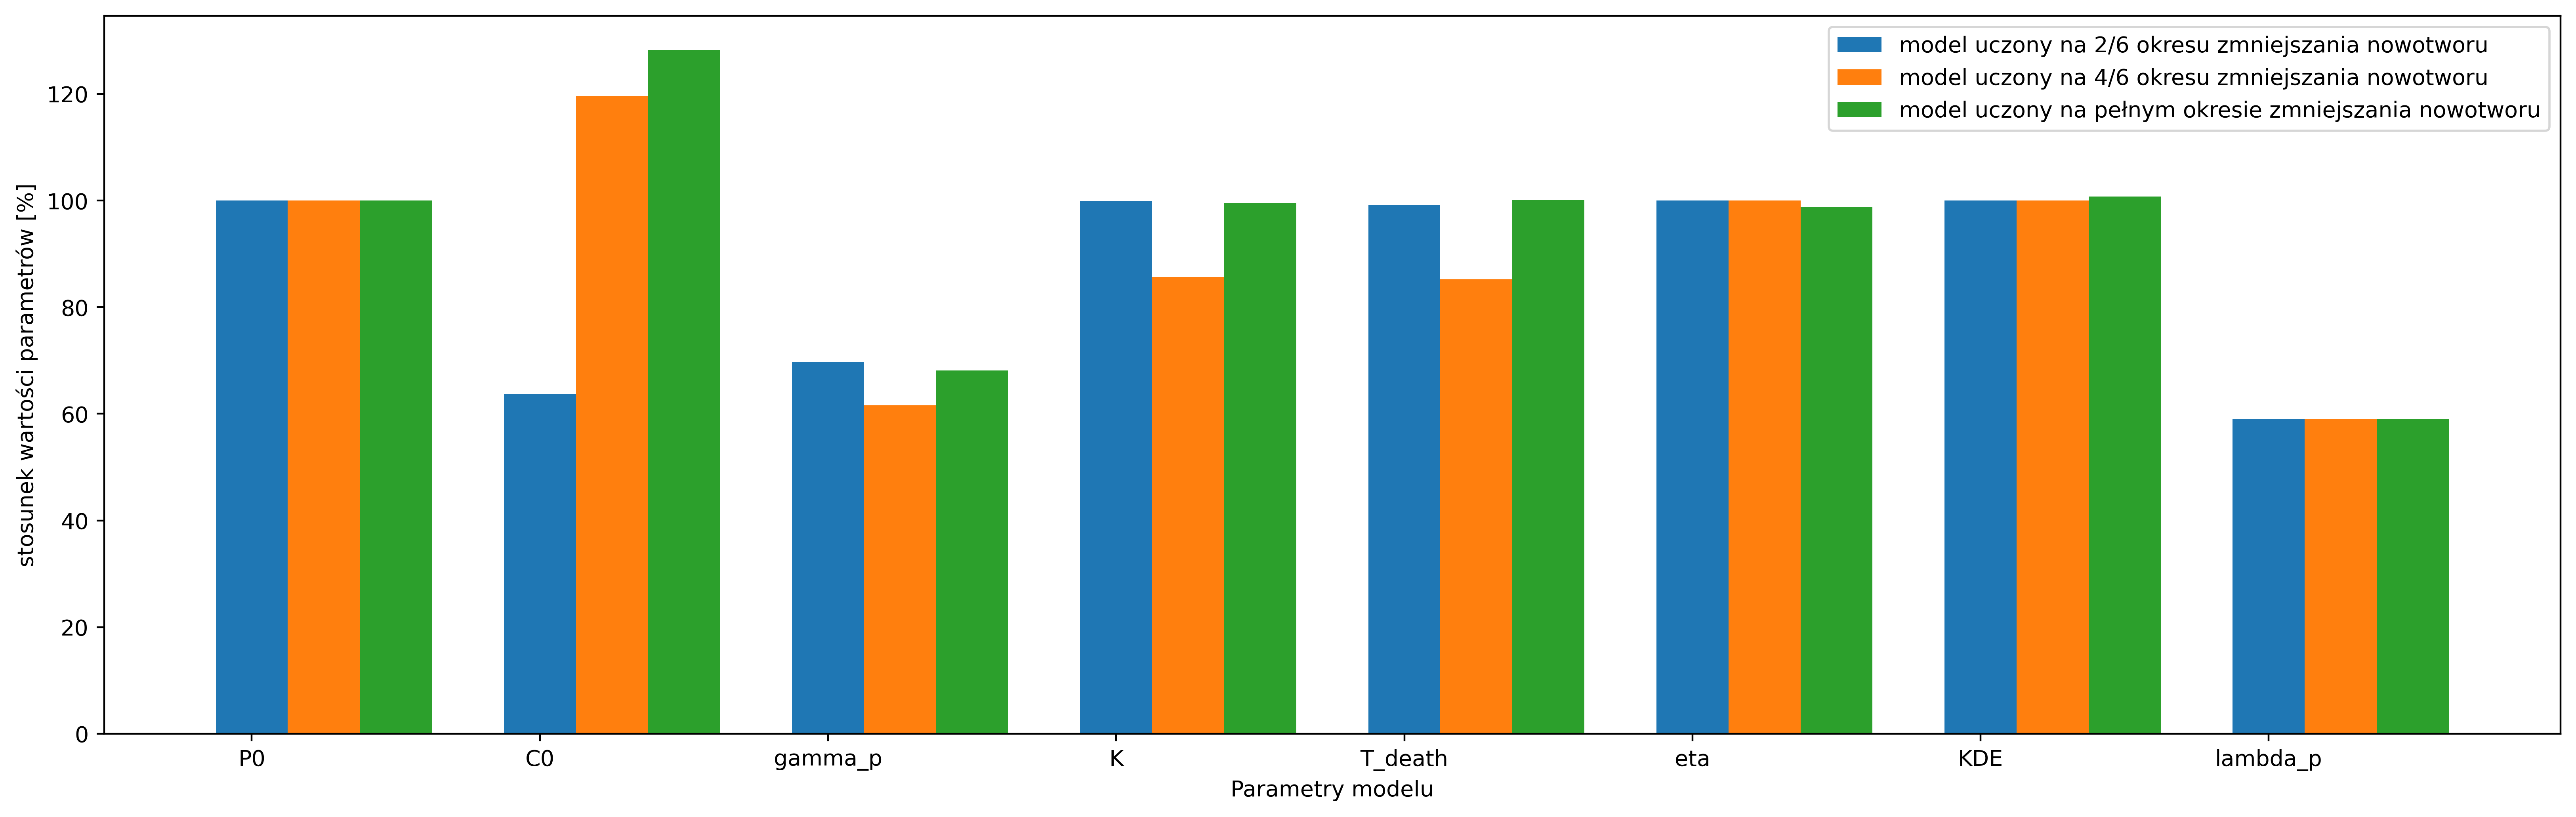

In [29]:
#EP1/Training12LinspKlusekShortEachIter.py
twosixth ={'P0': 142730, 'C0': 0.29260335165091184, 'gamma_p': 0.0015900357159866422, 'K': 349731.94061221986, 'T_death': 349183.7670237699, 'eta': 0.1999997909181045, 'KDE': 0.0006645082402329167, 'lambda_p': 5.0000000000005186e-05}
foursixth ={'P0': 142730, 'C0': 0.5492052970539315, 'gamma_p': 0.001403831904332538, 'K': 300000.43353702023, 'T_death': 300011.662859252, 'eta': 0.19999999999999973, 'KDE': 0.0006645078086020239, 'lambda_p': 5.000000000000649e-05}

sixsixth ={'P0': 142730, 'C0': 0.5891935249964346, 'gamma_p': 0.0015540004499398452, 'K': 348663.39878860785, 'T_death': 352477.75841191696, 'eta': 0.19762196143944394, 'KDE': 0.0006694464735574674, 'lambda_p': 5.0029064022806227e-05}

maximal ={'P0': 142730, 'C0': 0.459440542893518, 'gamma_p': 0.0022795266108102106, 'K': 350143.0759008658, 'T_death': 352131.9363377389, 'eta': 0.19998475189978773, 'KDE': 0.0006645392881261836, 'lambda_p': 8.474517120826804e-05}



compare_parameters(maximal, [twosixth,foursixth,sixsixth] , przedzialu_label,"Porównanie parametrów otrzymanych na uczeniu z przedziałem: fragmentem okresu podawania lekarstwa w stosunku do maksymalnego ",savefile="GS3" )

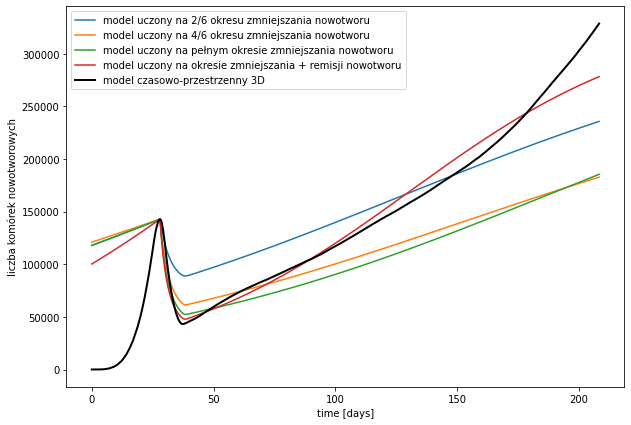

In [30]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth


def differentialForward(y, t, paras):
    [P, C] = y
    lambda_p = paras['lambda_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']*paras['C0']
    T_death = paras['T_death']
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K) - 1/T_death*P - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]

def differentialBackward(y, t, paras):
    [P, C] = y
    lambda_p = paras['lambda_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']*paras['C0']
    T_death = paras['T_death']
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K) - 1/T_death*P - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]

# USE_REAL_TIME = False


plot_parameters(differentialForward,twosixth,steps_forward,steps_backward,threatment_start,l26,USE_REAL_TIME,t_real,differentialBackward=differentialBackward)

plot_parameters(differentialForward,foursixth,steps_forward,steps_backward,threatment_start,l46,USE_REAL_TIME,t_real,differentialBackward=differentialBackward)

plot_parameters(differentialForward,sixsixth,steps_forward,steps_backward,threatment_start,l66,USE_REAL_TIME,t_real,differentialBackward=differentialBackward)

plot_parameters(differentialForward,maximal,steps_forward,steps_backward,threatment_start,maximal_label,USE_REAL_TIME,t_real,differentialBackward=differentialBackward)



plot_truth(t_true,P_true, USE_REAL_TIME,t_real)
if SHOW_TITLE:
    plt.title("Wpływ długości przedziału uczenia na jakość dopasowania modelu")
plt.legend()
plt.savefig(f"out/EP1/GS3_w.png")
plt.show()

# EP1/Training13_GS5

    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K)  - alpha*t - gamma_p * unit_step_fun(C,eta)  * P

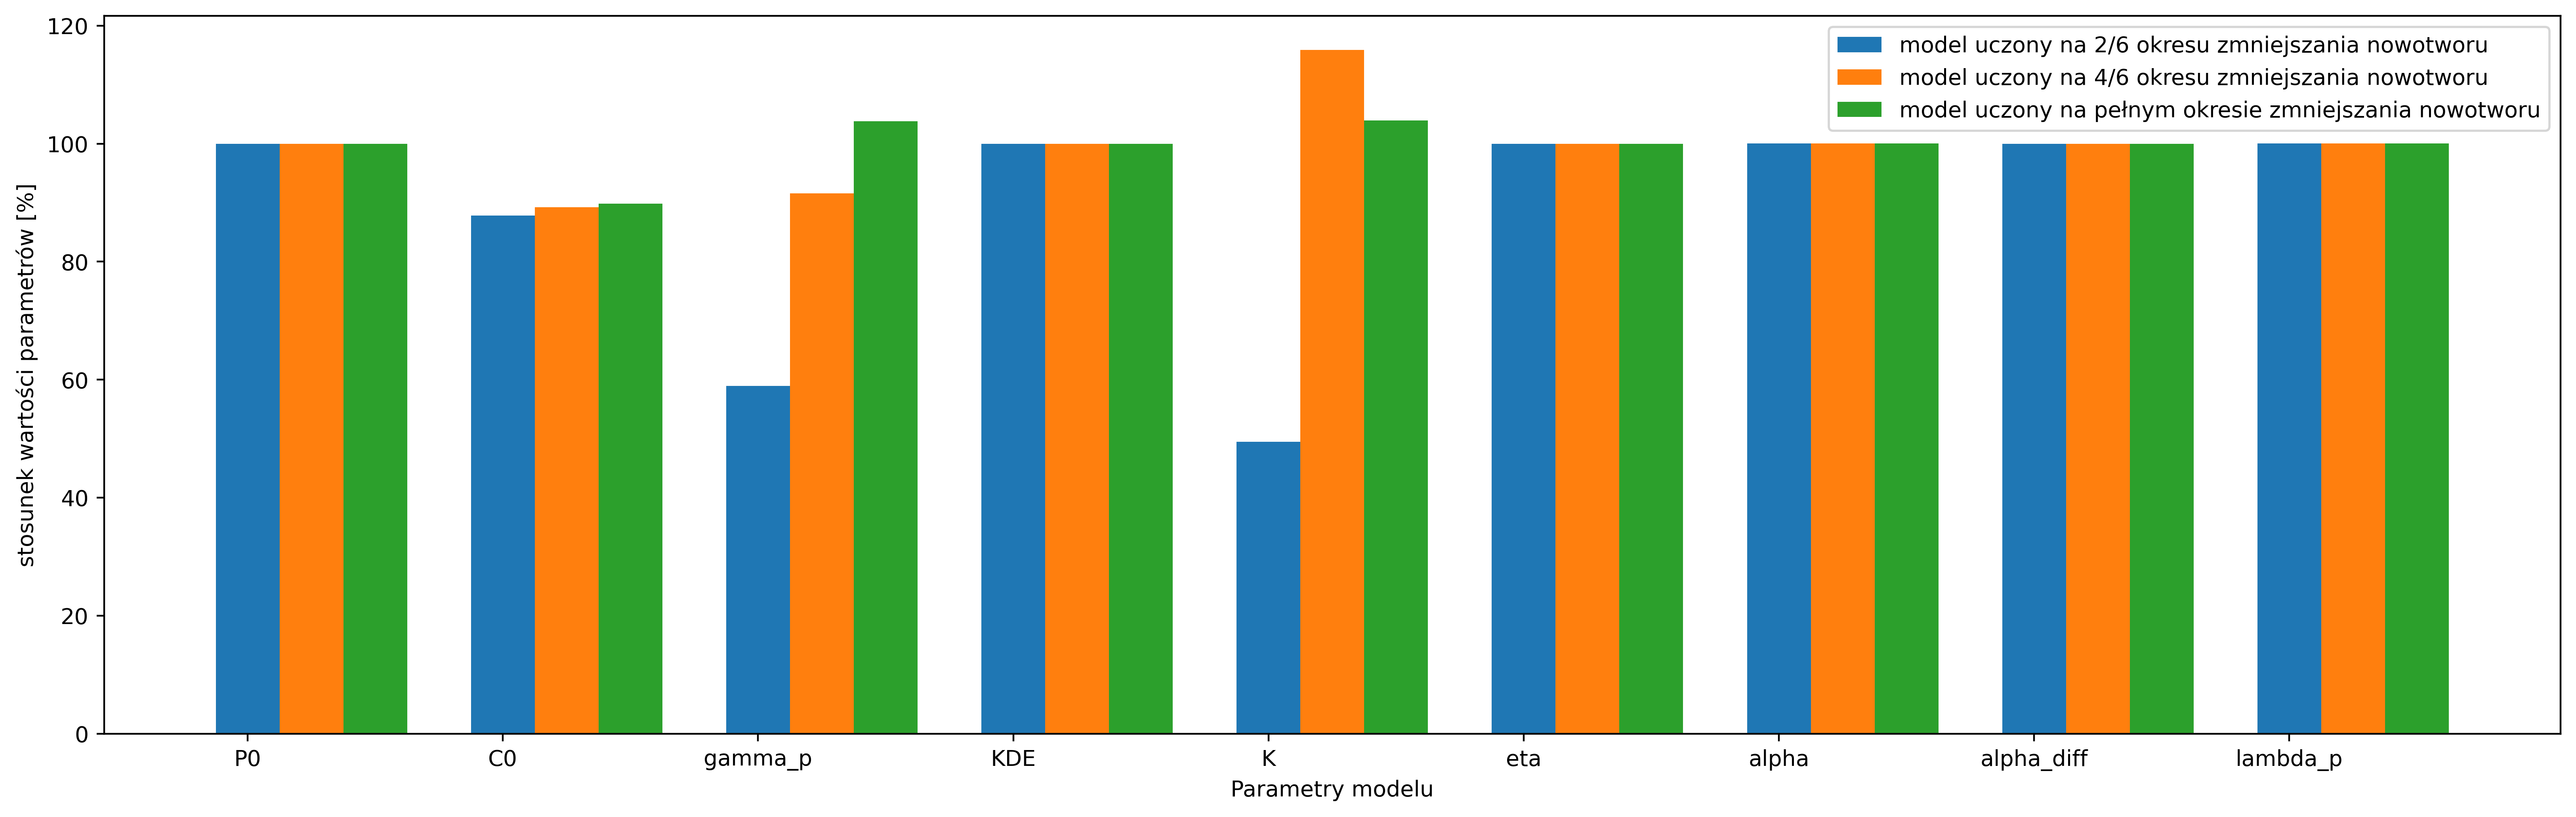

In [31]:
# EP1/Training13LinspKlusekShortEachIterLinear.py
twosixth ={'P0': 142730, 'C0': 3.000000000005372, 'gamma_p': 0.0001588864470724123, 'KDE': 0.0004970986012922255, 'K': 213534.2979687062, 'eta': 0.29999999759884977, 'alpha': 5.00208826404817e-06, 'alpha_diff': 15.000000000091202, 'lambda_p': 7.503132396117875e-05}

foursixth ={'P0': 142730, 'C0': 3.0499863179965083, 'gamma_p': 0.00024691584422164713, 'KDE': 0.000497098597990772, 'K': 499999.9228295814, 'eta': 0.2999999999976859, 'alpha': 5.000673349206882e-06, 'alpha_diff': 15.000000000001217, 'lambda_p': 7.501010023810932e-05}


sixsixth ={'P0': 142730, 'C0': 3.069933524916818, 'gamma_p': 0.0002797758186454924, 'KDE': 0.0004970985979876226, 'K': 448367.4487534575, 'eta': 0.2999999999999743, 'alpha': 5.000354834663137e-06, 'alpha_diff': 15.00000000000075, 'lambda_p': 7.50053225199508e-05}

maximal ={'P0': 142730, 'C0': 3.417147692102169, 'gamma_p': 0.0002695514139584379, 'KDE': 0.0004970990657212608, 'K': 431517.4495376834, 'eta': 0.29999966014490526, 'alpha': 5.000000000004441e-06, 'alpha_diff': 15.000000000000002, 'lambda_p': 7.500000000006663e-05}

compare_parameters(maximal, [twosixth,foursixth,sixsixth] , przedzialu_label,"Porównanie parametrów otrzymanych na uczeniu z przedziałem: fragmentem okresu podawania lekarstwa w stosunku do maksymalnego ",savefile="GS5" )

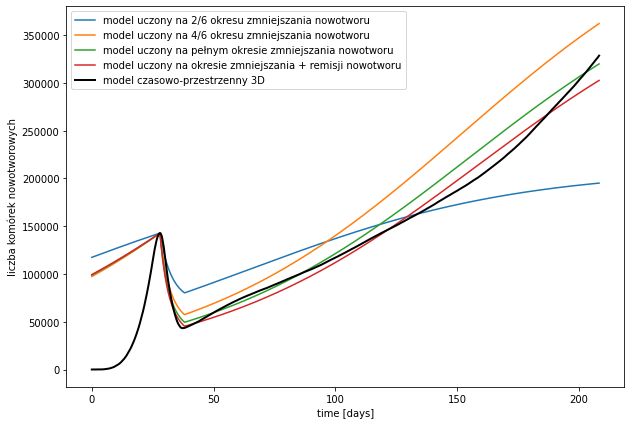

In [32]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth

def differentialForward(y, t, paras):
    [P, C] = y
    alpha = paras['alpha']
    lambda_p = paras['lambda_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']
    eta = eta*paras['C0']
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K)  - alpha*t - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]

def differentialBackward(y, t, paras):
    [P, C] = y
    alpha = paras['alpha']
    lambda_p = paras['lambda_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']
    eta = eta*paras['C0']

    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K)  - alpha*t - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]


# USE_REAL_TIME = False

plot_parameters(differentialForward,twosixth,steps_forward,steps_backward,threatment_start,l26,USE_REAL_TIME,t_real,differentialBackward=differentialBackward)

plot_parameters(differentialForward,foursixth,steps_forward,steps_backward,threatment_start,l46,USE_REAL_TIME,t_real,differentialBackward=differentialBackward)

plot_parameters(differentialForward,sixsixth,steps_forward,steps_backward,threatment_start,l66,USE_REAL_TIME,t_real,differentialBackward=differentialBackward)

plot_parameters(differentialForward,maximal,steps_forward,steps_backward,threatment_start,maximal_label,USE_REAL_TIME,t_real,differentialBackward=differentialBackward)



plot_truth(t_true,P_true, USE_REAL_TIME,t_real)
if SHOW_TITLE:
    plt.title("Wpływ długości przedziału uczenia na jakość dopasowania modelu")
plt.legend()
plt.savefig(f"out/EP1/GS5_w.png")
plt.show()

# EP1/Training15_GS1
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K)  - gamma_p * unit_step_fun(C,eta)  * P

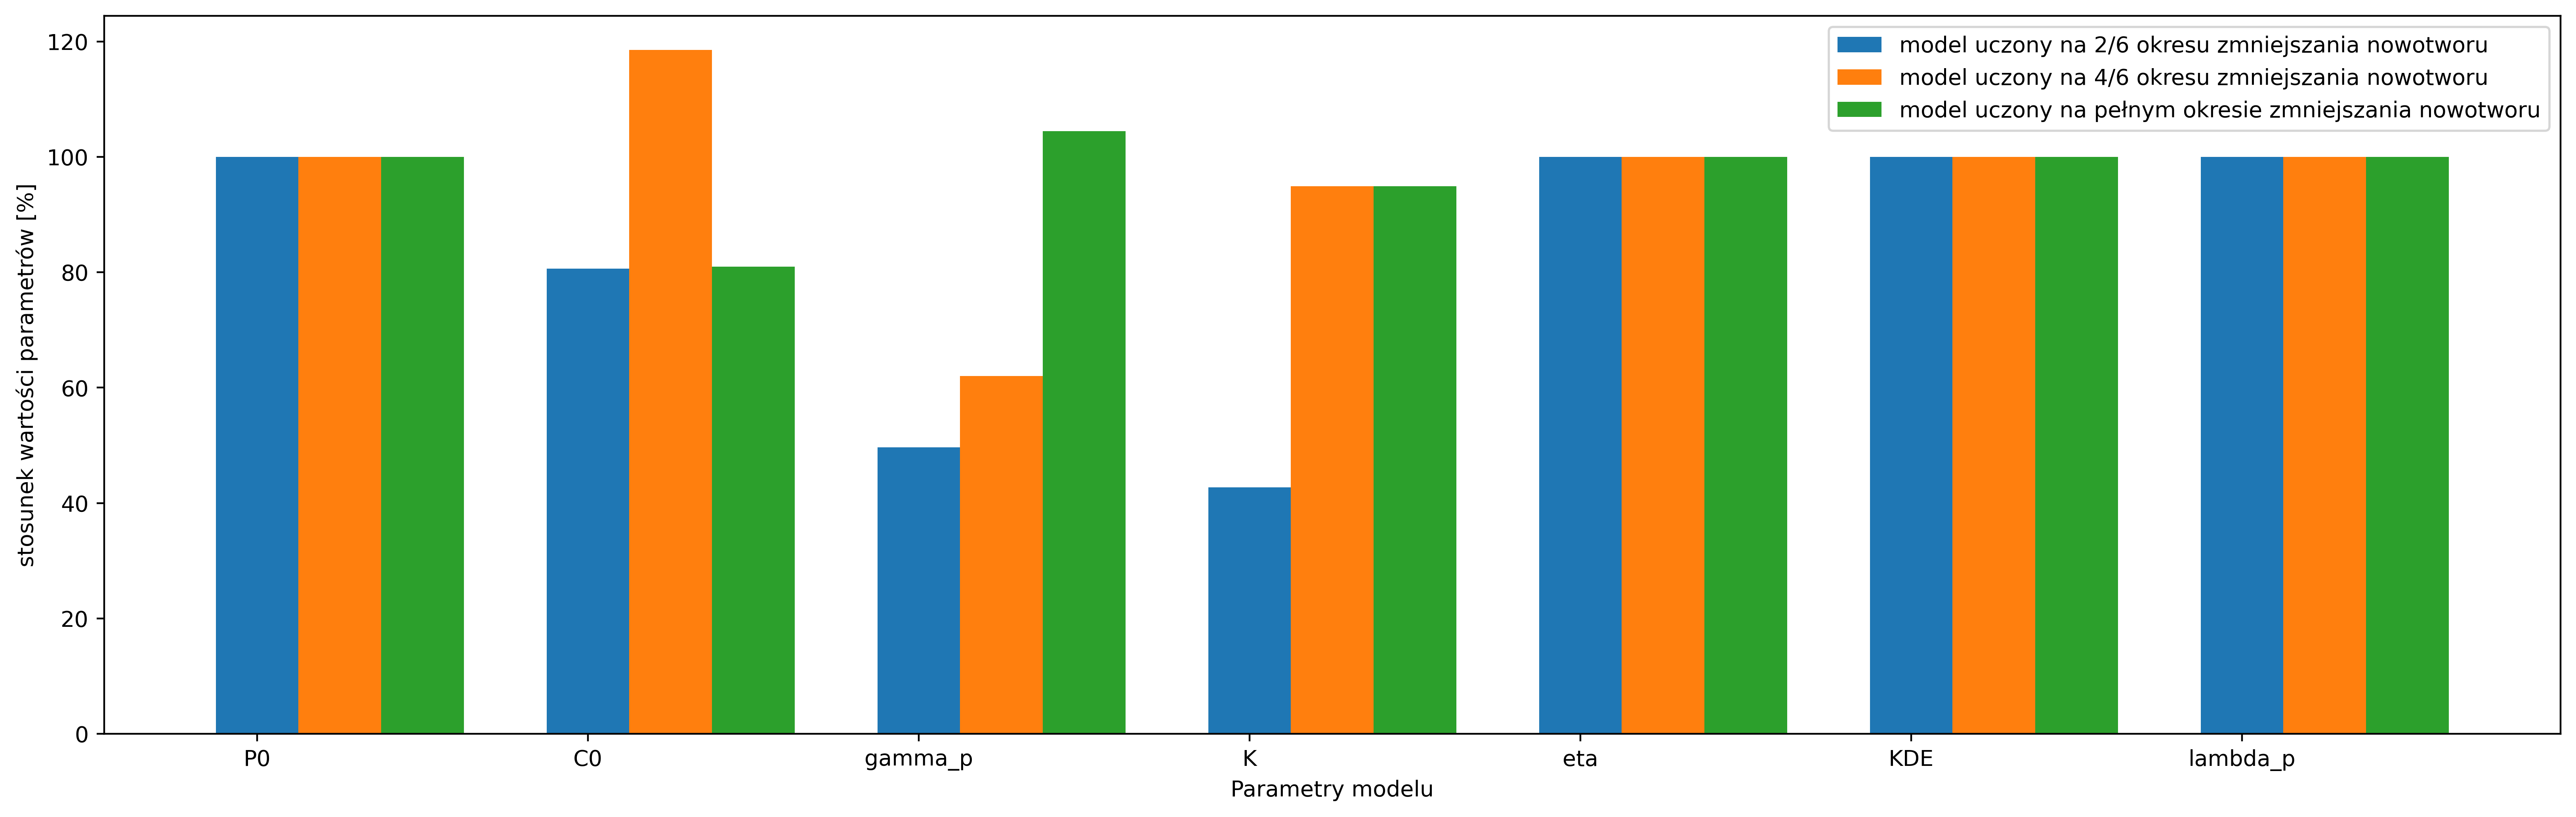

In [33]:
# EP1/Training15LinspKlusekShortEachIterLinear.py
twosixth ={'P0': 142730, 'C0': 3.218339078013681, 'gamma_p': 0.0001287482963594978, 'K': 128468.99183970386, 'eta': 0.2999999999862645, 'KDE': 0.000497098598006491, 'lambda_p': 0.00010000017717057272}

foursixth ={'P0': 142730, 'C0': 4.732910030452569, 'gamma_p': 0.0001607624765589997, 'K': 285485.99995026784, 'eta': 0.29999999999999993, 'KDE': 0.0004970985979875873, 'lambda_p': 0.00010000000000014344}

sixsixth ={'P0': 142730, 'C0': 3.233150308490246, 'gamma_p': 0.0002707887674688813, 'K': 285485.99965608487, 'eta': 0.2999999999999944, 'KDE': 0.0004970985979875948, 'lambda_p': 0.00010000005065546802}

maximal ={'P0': 142730, 'C0': 3.9930629985791746, 'gamma_p': 0.0002592574220046403, 'K': 300806.1654710956, 'eta': 0.2999999978611727, 'KDE': 0.0004970986009311975, 'lambda_p': 0.00010002526842915387}


compare_parameters(maximal, [twosixth,foursixth,sixsixth] , przedzialu_label,"Porównanie parametrów otrzymanych na uczeniu z przedziałem: fragmentem okresu podawania lekarstwa w stosunku do maksymalnego ",savefile="GS1" )

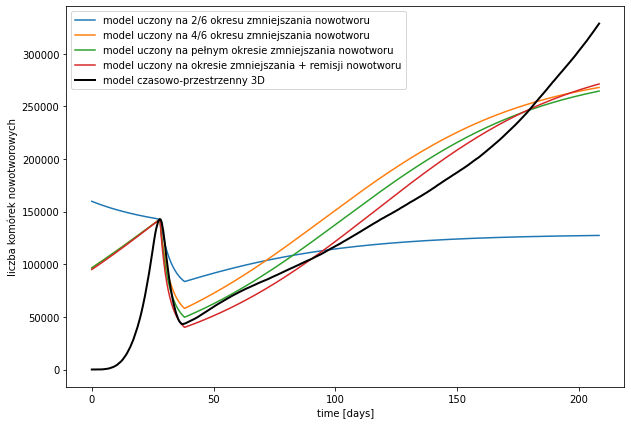

In [34]:

def differentialForward(y, t, paras):
    [P, C] = y
    lambda_p = paras['lambda_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']
    eta = eta*paras['C0']

    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K)  - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]

# USE_REAL_TIME = False

plot_parameters(differentialForward,twosixth,steps_forward,steps_backward,threatment_start,l26,USE_REAL_TIME,t_real)

plot_parameters(differentialForward,foursixth,steps_forward,steps_backward,threatment_start,l46,USE_REAL_TIME,t_real)

plot_parameters(differentialForward,sixsixth,steps_forward,steps_backward,threatment_start,l66,USE_REAL_TIME,t_real)

plot_parameters(differentialForward,maximal,steps_forward,steps_backward,threatment_start,maximal_label,USE_REAL_TIME,t_real)


plot_truth(t_true,P_true, USE_REAL_TIME,t_real)
if SHOW_TITLE:
    plt.title("Wpływ długości przedziału uczenia na jakość dopasowania modelu")
plt.legend()
plt.savefig(f"out/EP1/GS1_w.png")
plt.show()

# EP1/Training16_GS4
    dCdt =-KDE * C*P -KDE2*C
    dPdt = lambda_p * P*(1-P/K)  - gamma_p * unit_step_fun(C,eta)  * P

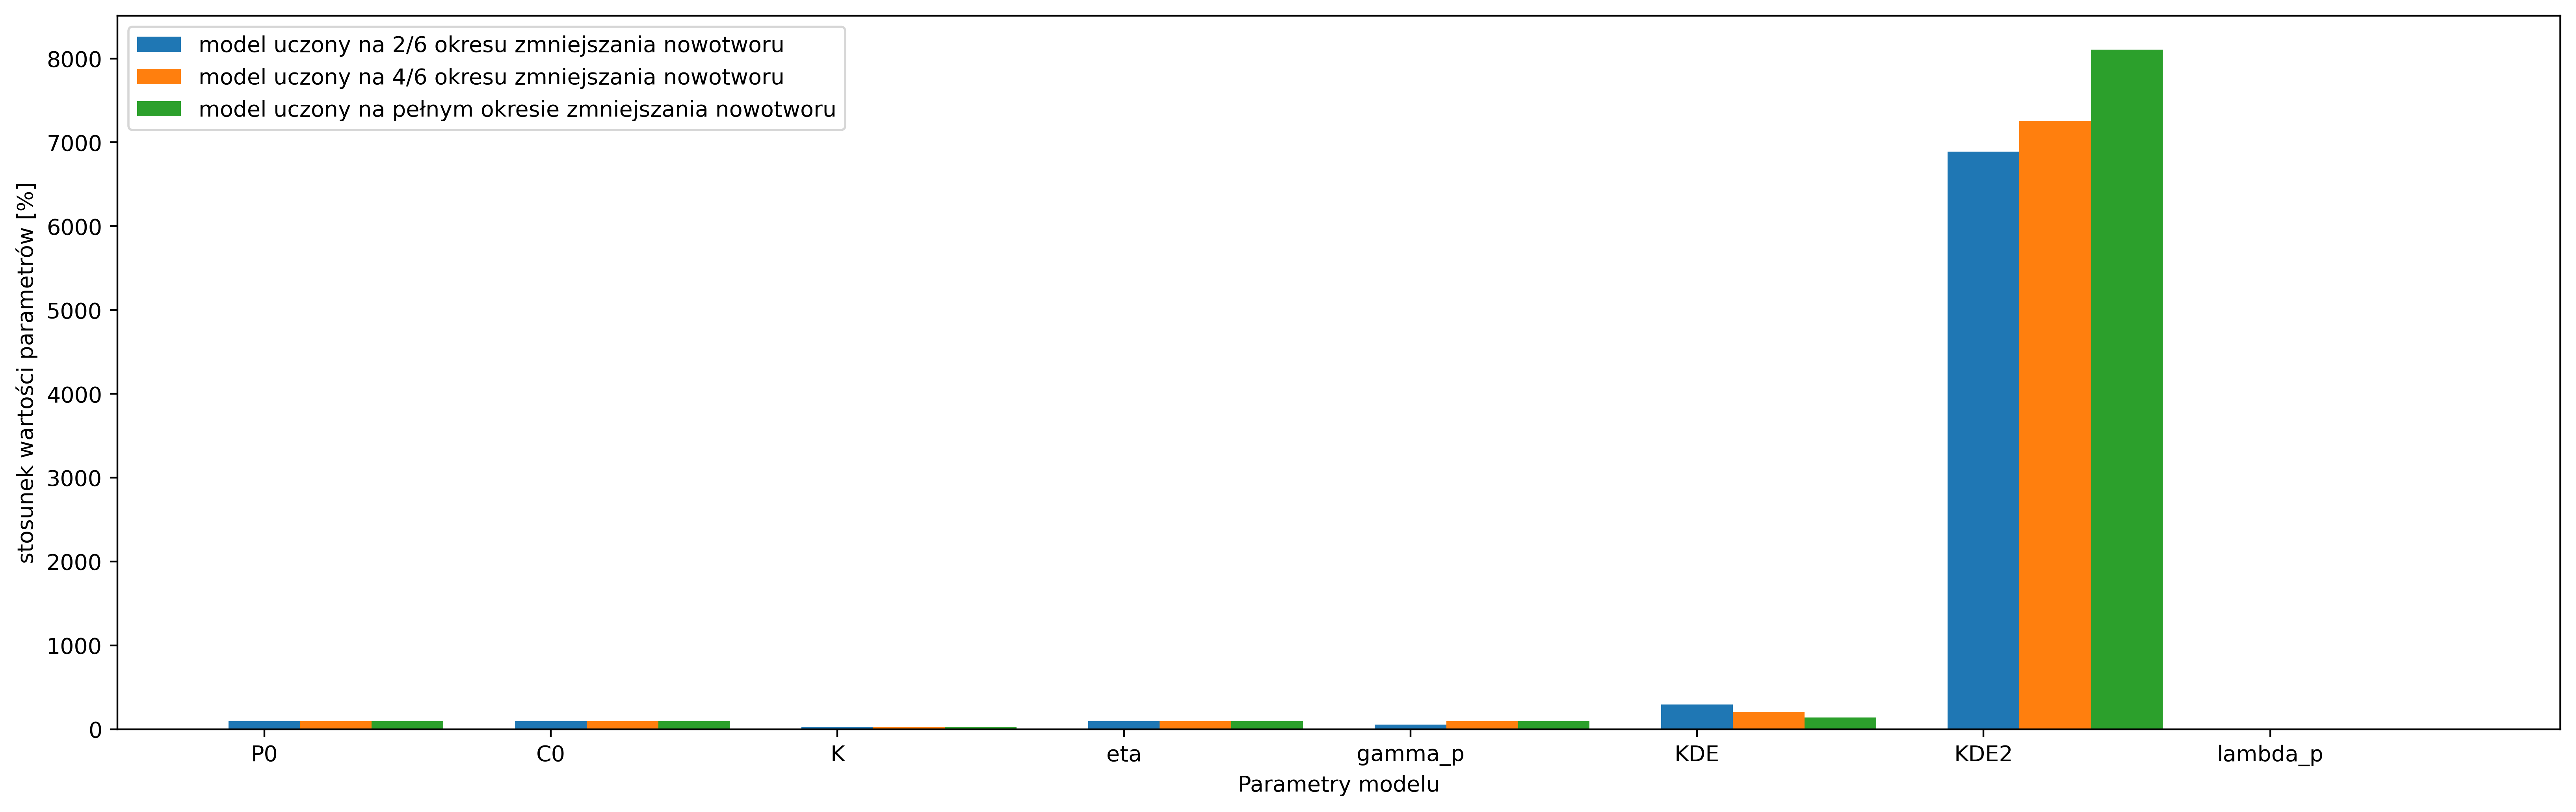

In [35]:
#EP1/Training16LinspKlusekShortDiffCurement.py
twosixth ={'P0': 142730, 'C0': 9.99993426371419, 'K': 142743.00001415526, 'eta': 0.10000000000508108, 'gamma_p': 0.005708391376920618, 'KDE': 2.943462621342161e-06, 'KDE2': 0.006887327413443246, 'lambda_p': 1.000002695621369e-06}


foursixth ={'P0': 142730, 'C0': 9.985801342755572, 'K': 142743.00000026842, 'eta': 0.10000000000000087, 'gamma_p': 0.009999998985222809, 'KDE': 2.0539352443170613e-06, 'KDE2': 0.007252288959715366, 'lambda_p': 1.0000000055511149e-06}


sixsixth ={'P0': 142730, 'C0': 9.983236794467333, 'K': 142743.0000000138, 'eta': 0.10000000000000472, 'gamma_p': 0.009999999999952868, 'KDE': 1.4208058235081684e-06, 'KDE2': 0.008105165355885261, 'lambda_p': 1.000000001110223e-06}

maximal ={'P0': 142730, 'C0': 9.999990491752648, 'K': 558444.3263698162, 'eta': 0.10000000000000002, 'gamma_p': 0.00999999999775868, 'KDE': 1.0000000000333373e-06, 'KDE2': 0.0001000000001176966, 'lambda_p': 5.593181954540144e-05}



compare_parameters(maximal, [twosixth,foursixth,sixsixth] , przedzialu_label,"Porównanie parametrów otrzymanych na uczeniu z przedziałem: fragmentem okresu podawania lekarstwa w stosunku do maksymalnego ",savefile="GS4" )

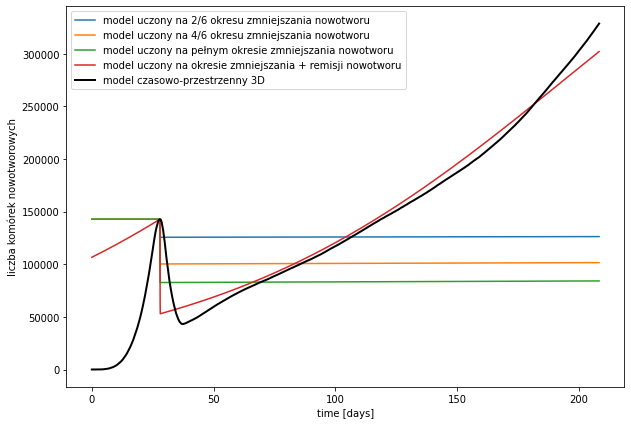

In [36]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth


def differentialForward(y, t, paras):
    [P, C] = y
    lambda_p = paras['lambda_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    KDE2 = paras['KDE2']
    K = paras['K']
    eta = paras['eta']
    eta = eta*paras['C0']

    dCdt =-KDE * C*P -KDE2*C
    dPdt = lambda_p * P*(1-P/K)  - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]

plot_parameters(differentialForward, twosixth, steps_forward, steps_backward, threatment_start, l26,
                USE_REAL_TIME, t_real)

plot_parameters(differentialForward, foursixth, steps_forward, steps_backward, threatment_start, l46,
                USE_REAL_TIME, t_real)

plot_parameters(differentialForward, sixsixth, steps_forward, steps_backward, threatment_start, l66,
                USE_REAL_TIME, t_real)

plot_parameters(differentialForward, maximal, steps_forward, steps_backward, threatment_start, maximal_label,
                USE_REAL_TIME, t_real)

plot_truth(t_true, P_true, USE_REAL_TIME, t_real)
if SHOW_TITLE:
    plt.title("Porównanie modeli w zależności od przedziału uczenia")
plt.legend()
plt.savefig(f"out/EP1/GS4_w.png")
plt.show()

# Porównanie modeli dla pacjenta EP1


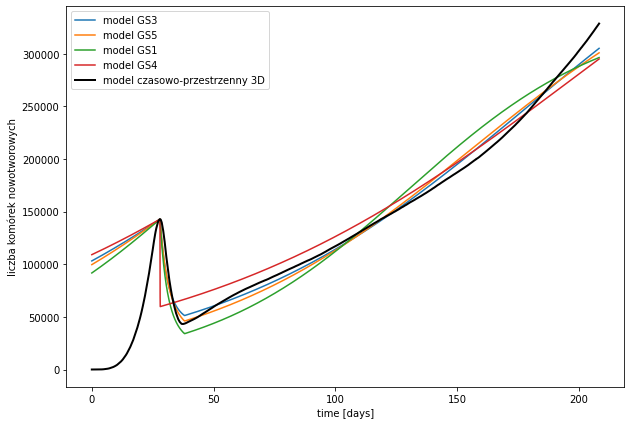

In [37]:
import matplotlib
from asymilacja.model.utils_linsp import GS3, GS4, GS5, GS1
matplotlib.rcParams['figure.figsize'] = [10, 7]

# uczenie na maxymalnym

gs3_ep1 = {'P0': 142730, 'C0': 9.926675253409318, 'gamma_p': 9.672580298784273e-05, 'K': 499999.99999999587, 'T_death': 49999430.23646551, 'eta': 0.1999999982778311, 'KDE': 0.0006645078121572853, 'lambda_p': 6.408563735243844e-05}
gs5_ep1 = {'P0': 142730, 'C0': 3.1350094623894074, 'gamma_p': 0.0002899885604836935, 'KDE': 0.0004971029545181719, 'K': 424354.54431511427, 'eta': 0.2999968345615772, 'alpha': 5.000000000208709e-06, 'alpha_diff': 15.000000002287718, 'lambda_p': 7.500000001456923e-05}

gs1_ep1 ={'P0': 142730, 'C0': 8.700274353725366, 'gamma_p': 0.00013311626227477052, 'K': 341207.7156199056, 'eta': 0.2999961936326909, 'KDE': 0.0004971038366215764, 'lambda_p': 0.00010000000018030913}


gs4_ep1 ={'P0': 142730, 'C0': 9.34559369145147, 'K': 558444.8997419951, 'eta': 0.11001706761400733, 'gamma_p': 0.009999666837183334, 'KDE': 1.0000034632512612e-06, 'KDE2': 0.00010001178571636674, 'lambda_p': 5.1653655363233125e-05}

plot_parameters(GS3, gs3_ep1, steps_forward, steps_backward, threatment_start, "model GS3",
                USE_REAL_TIME, t_real)

plot_parameters(GS5, gs5_ep1, steps_forward, steps_backward, threatment_start, "model GS5",
                USE_REAL_TIME, t_real)

plot_parameters(GS1, gs1_ep1, steps_forward, steps_backward, threatment_start, "model GS1",
                USE_REAL_TIME, t_real)

plot_parameters(GS4, gs4_ep1, steps_forward, steps_backward, threatment_start, "model GS4",
                USE_REAL_TIME, t_real)

plot_truth(t_true, P_true, USE_REAL_TIME, t_real)
if SHOW_TITLE:
    plt.title("Porównanie modeli w zależności od przedziału uczenia")
plt.legend()
plt.show()
# Porównanie modeli dla pacjenta EP1



# Porównanie parametrów jeden model 3 pacjentów

In [38]:
gs3_ep1 ={'P0': 142730, 'C0': 9.926675253409318, 'gamma_p': 9.672580298784273e-05, 'K': 499999.99999999587, 'T_death': 49999430.23646551, 'eta': 0.1999999982778311, 'KDE': 0.0006645078121572853, 'lambda_p': 6.408563735243844e-05}

gs3_ep2 ={'P0': 202559, 'C0': 4.468727413845869, 'gamma_p': 0.00033333238801296034, 'K': 899999.9999999449, 'T_death': 49999999.979609825, 'eta': 0.1999999724801217, 'KDE': 0.0005994182681689019, 'lambda_p': 0.00010679171746681122}

gs3_ep3 = {'P0': 587182, 'C0': 9.66006330085422, 'gamma_p': 0.0001432159631575763, 'K': 2368055.1005040538, 'T_death': 3237297.322554524, 'eta': 0.1999999999931621, 'KDE': 0.000527338765553175, 'lambda_p': 6.948734251169973e-05}




<Figure size 1600x1200 with 0 Axes>

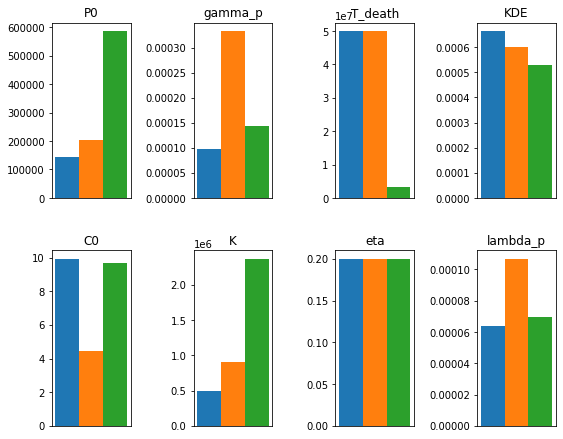

In [39]:
def compare_patients(parameters, labels,title, ROWS =2,COLUMNS = 4 ):  # fullParams, [threesixth,fivesixth,sixsixth] , ['1/2','5/6','6/6']
    figure(figsize=(20, 15), dpi=80)

    fig, axs = plt.subplots(ROWS, COLUMNS)

    parameterNames =list(parameters[0].keys())
    parameterId = 0

    for c in range(COLUMNS):
        for r in range(ROWS):
            i = 0
            for patientId in range(3):
                params = parameters[patientId]
                label = labels[patientId]

                X_axis = np.arange(1)
                axs[r, c].bar(X_axis +i, params[parameterNames[parameterId]], 0.25, label=label)
                i+=0.25
            axs[r, c].set_title(f'{parameterNames[parameterId]}')
            axs[r, c].set_xticks([])

            parameterId+=1

            if parameterId == len(parameterNames):
                break


    X = parameters[0].keys()

    # plt.xticks(X_axis, X)
    # plt.xlabel("Parametry modelu")
    # plt.ylabel("nowa wartość / wartość w modelu pełnym [%]")
    # if SHOW_TITLE:
    #     plt.title(title)
    # plt.legend()
    plt.subplots_adjust(left=0.2,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.8,
                    hspace=0.3)

    plt.show()


compare_patients([gs3_ep1,gs3_ep2,gs3_ep3] , ["EP1","EP2","EP3"],"" )
